In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('D:/IIT Delhi/Dataset_july/data_files/data_1.csv')

In [3]:
df.head(5)

,Time,Potential,Current,SOC
0,0.4,3.97,0.40,0.629932
1,1.0,3.97,1.25,0.629554
2,2.0,3.98,1.25,0.629679
3,3.0,3.98,1.25,0.629821
4,4.0,3.98,1.25,0.629946


In [4]:
df.isnull().sum()

Time         0
Potential    0
Current      0
SOC          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Time       1048572 non-null  float64
 1   Potential  1048572 non-null  float64
 2   Current    1048572 non-null  float64
 3   SOC        1048572 non-null  float64
dtypes: float64(4)
memory usage: 32.0 MB


In [6]:
df.shape

(1048572, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Time       1048572 non-null  float64
 1   Potential  1048572 non-null  float64
 2   Current    1048572 non-null  float64
 3   SOC        1048572 non-null  float64
dtypes: float64(4)
memory usage: 32.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

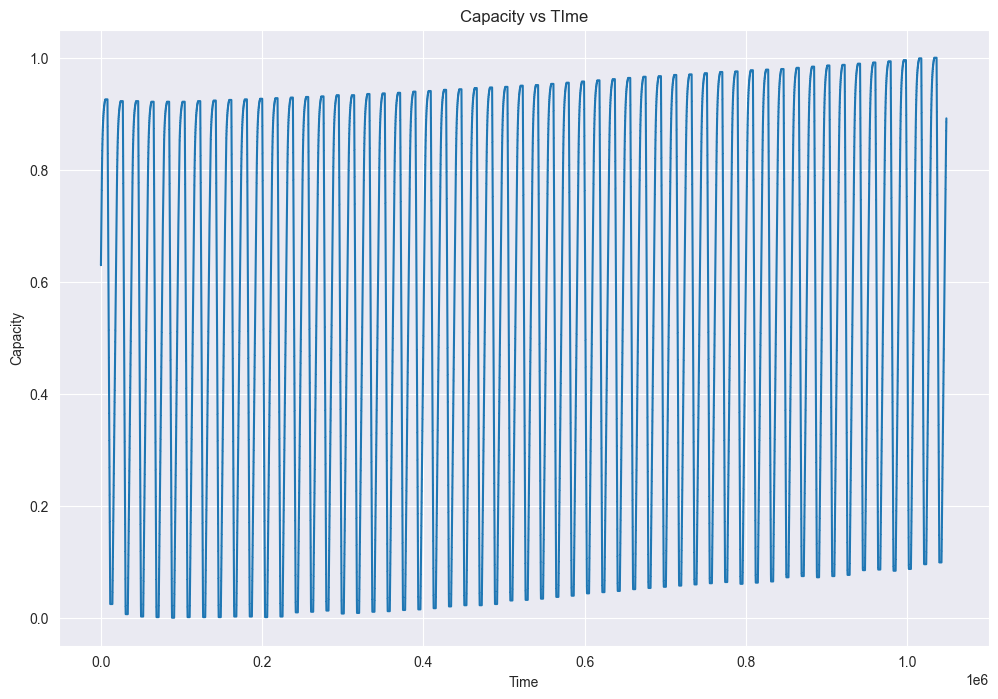

In [8]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['SOC'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Raw SOC

CPU times: total: 4min 37s
Wall time: 4min 44s


C:\Users\Bhawit Balodi\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:885: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:885: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

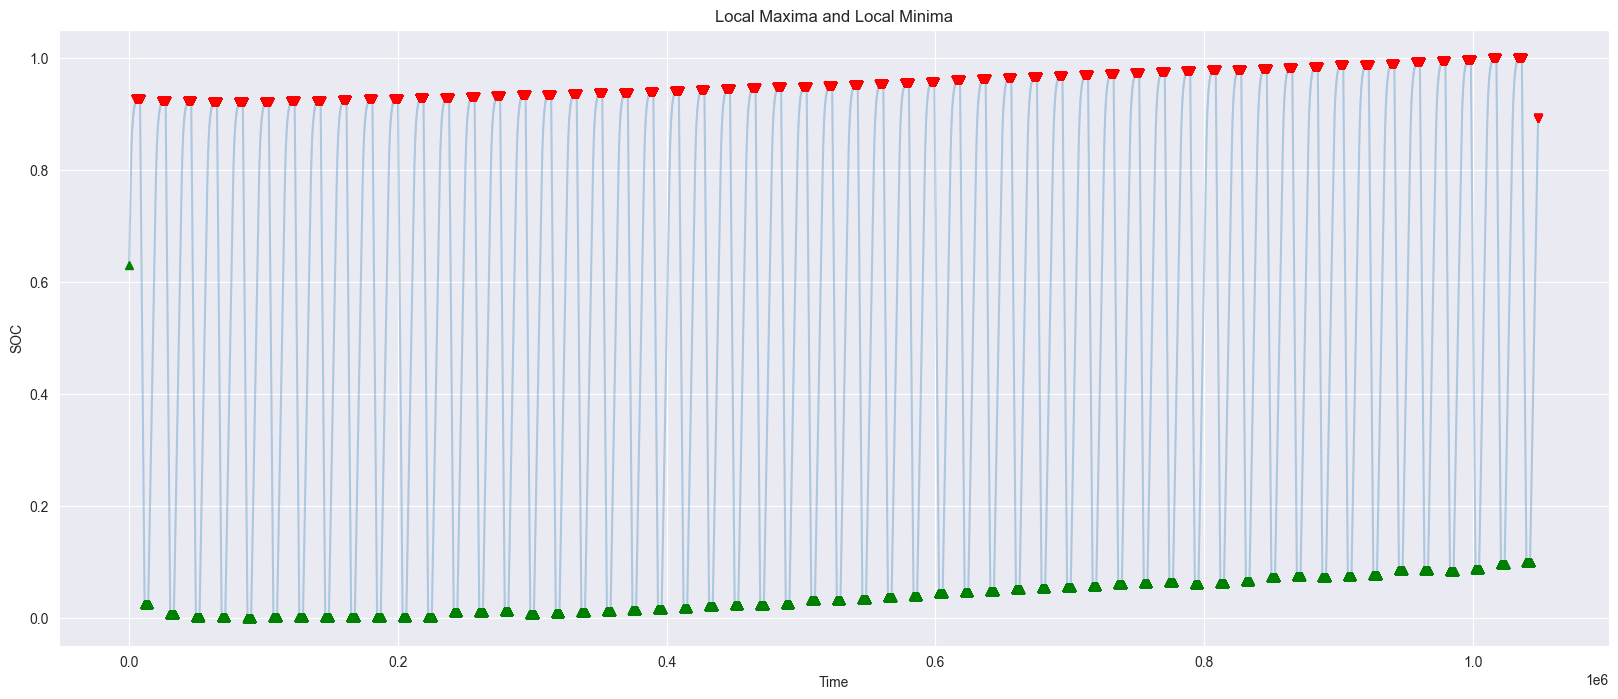

In [9]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.SOC.values, np.less_equal, order=5000)[0]
ilocs_max = argrelextrema(df.SOC.values, np.greater_equal, order=5000)[0]

df.SOC.plot(figsize=(20,8), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].SOC.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].SOC.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("SOC")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [10]:
raw_maximum_point = df['SOC'][ilocs_max].unique()
raw_minimum_point = df['SOC'][ilocs_min].unique()

In [11]:
print(raw_maximum_point)
print('Maximum Point is - ',raw_maximum_point.max())

[0.92568884 0.92250413 0.92144256 0.9235657  0.92462727 0.92675041
 0.92781198 0.92887355 0.92993512 0.93099669 0.93311983 0.93524297
 0.93630454 0.93736611 0.93948925 0.94055082 0.94267396 0.94373553
 0.94585867 0.94692024 0.94798181 0.95010495 0.95116652 0.95328966
 0.9554128  0.95753594 0.95965908 0.96178221 0.96390535 0.96602849
 0.96709006 0.9692132  0.97027477 0.97239791 0.97452105 0.97558262
 0.97770576 0.97876733 0.9798289  0.98195204 0.98407518 0.98619832
 0.98725989 0.98938303 0.99150617 0.99362931 0.99575245 0.99893716
 0.99999873 0.89171861]
Maximum Point is -  0.999998726


Text(0.5, 1.0, 'Dataset')

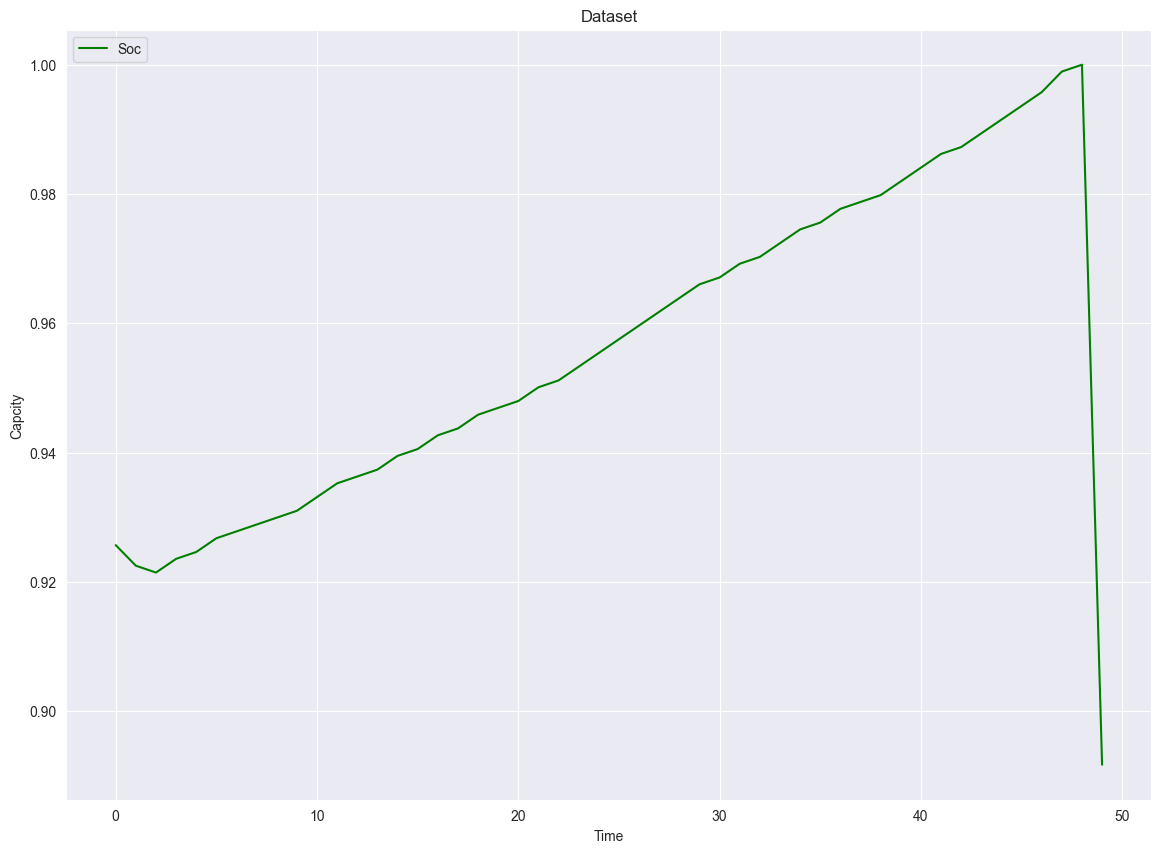

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
# plt.plot(df['SOC'],color='orange')
plt.plot(raw_maximum_point,color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

# Data Cleaning

In [13]:
df.isnull().sum()

Time         0
Potential    0
Current      0
SOC          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Time       1048572 non-null  float64
 1   Potential  1048572 non-null  float64
 2   Current    1048572 non-null  float64
 3   SOC        1048572 non-null  float64
dtypes: float64(4)
memory usage: 32.0 MB


In [15]:
# Capacity = df['Capacity']

# Modeling

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [17]:
df.head()

,Time,Potential,Current,SOC
0,0.000000e+00,0.841379,0.769231,0.629932
1,5.722075e-07,0.841379,0.994695,0.629554
2,1.525887e-06,0.848276,0.994695,0.629679
3,2.479566e-06,0.848276,0.994695,0.629821
4,3.433245e-06,0.848276,0.994695,0.629946


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Time       1048572 non-null  float64
 1   Potential  1048572 non-null  float64
 2   Current    1048572 non-null  float64
 3   SOC        1048572 non-null  float64
dtypes: float64(4)
memory usage: 32.0 MB


In [19]:
# charge = df.pop('Charge')
# capacity = df.pop('Capacity')
Y = df.pop('SOC')
X = df

In [20]:
X.head(5)

,Time,Potential,Current
0,0.000000e+00,0.841379,0.769231
1,5.722075e-07,0.841379,0.994695
2,1.525887e-06,0.848276,0.994695
3,2.479566e-06,0.848276,0.994695
4,3.433245e-06,0.848276,0.994695


In [21]:
Y.head(5)

0    0.629932
1    0.629554
2    0.629679
3    0.629821
4    0.629946
Name: SOC, dtype: float64

# Load pretrained model

## Model 4

In [22]:
import tensorflow_addons as tfa
import tensorflow as tf

C:\Users\Bhawit Balodi\AppData\Roaming\Python\Python310\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [23]:
model_3 = tf.keras.models.load_model('D:/IIT Delhi/Dataset_july/SOC_esti/Saved_models/model_3_SOCesti.h5')

# Show the model architecture
model_3.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,721
Trainable params: 14,721
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_3.evaluate(X,Y)

32768/32768 [==============================] - 44s 1ms/step - loss: 0.0028 - rmse: 0.0054 - r2: 0.9998 - mae: 0.0028 - mse: 2.9001e-05 - mape: 538.3759


[0.002792075742036104,
 0.005385292693972588,
 0.9997676014900208,
 0.002792075742036104,
 2.9001377697568387e-05,
 538.3759155273438]

In [25]:
Y_pred_3 = model_3.predict(X)

32768/32768 [==============================] - 29s 890us/step


In [26]:
Y_pred_3

array([[0.6761855 ],
       [0.53787327],
       [0.5511316 ],
       ...,
       [0.89372694],
       [0.89372694],
       [0.8938515 ]], dtype=float32)

In [27]:
example = Y_pred_3

In [28]:
example_1 = np.squeeze(example)
example_1

array([0.6761855 , 0.53787327, 0.5511316 , ..., 0.89372694, 0.89372694,
       0.8938515 ], dtype=float32)

# Model 7

In [29]:
model_7 = tf.keras.models.load_model('D:/IIT Delhi/Dataset_july/SOC_esti/Saved_models/model_7_SOCesti.h5')

# Show the model architecture
model_7.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 20)             1760      
                                                                 
 lstm_1 (LSTM)               (None, 10)                1240      
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,121
Trainable params: 3,121
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_7.evaluate(X,Y)

32768/32768 [==============================] - 59s 2ms/step - loss: 0.0523 - rmse: 0.0829 - r2: 0.9449 - mae: 0.0523 - mse: 0.0069 - mape: 17138.8125


[0.0523214153945446,
 0.08294074982404709,
 0.9448707103729248,
 0.0523214153945446,
 0.006879168096929789,
 17138.8125]

In [31]:
Y_pred_7 = model_7.predict(X)

32768/32768 [==============================] - 53s 2ms/step


In [32]:
example_2 = np.squeeze(Y_pred_7)
example_2

array([0.56373835, 0.4671868 , 0.47896022, ..., 0.85467196, 0.8546718 ,
       0.8548475 ], dtype=float32)

# Model 10

In [33]:
model_12 = tf.keras.models.load_model('D:/IIT Delhi/Dataset_july/SOC_esti/Saved_models/model_12_SOCesti.h5')

# Show the model architecture
model_12.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 2, 10)             30        
                                                                 
 conv1d_4 (Conv1D)           (None, 1, 32)             672       
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 873
Trainable params: 873
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_12.evaluate(X,Y)

32768/32768 [==============================] - 33s 991us/step - loss: 0.0184 - rmse: 0.0281 - mae: 0.0184 - mse: 7.9209e-04 - mape: 4230.4497


[0.018388986587524414,
 0.02814417891204357,
 0.018388986587524414,
 0.0007920947973616421,
 4230.44970703125]

In [35]:
Y_pred_12 = model_12.predict(X)

32768/32768 [==============================] - 26s 799us/step


In [36]:
print(Y_pred_12)

[[0.5887006 ]
 [0.48596588]
 [0.4985979 ]
 ...
 [0.91371095]
 [0.9137112 ]
 [0.9138319 ]]


In [37]:
example_3 = np.squeeze(Y_pred_12)
example_3

array([0.5887006 , 0.48596588, 0.4985979 , ..., 0.91371095, 0.9137112 ,
       0.9138319 ], dtype=float32)

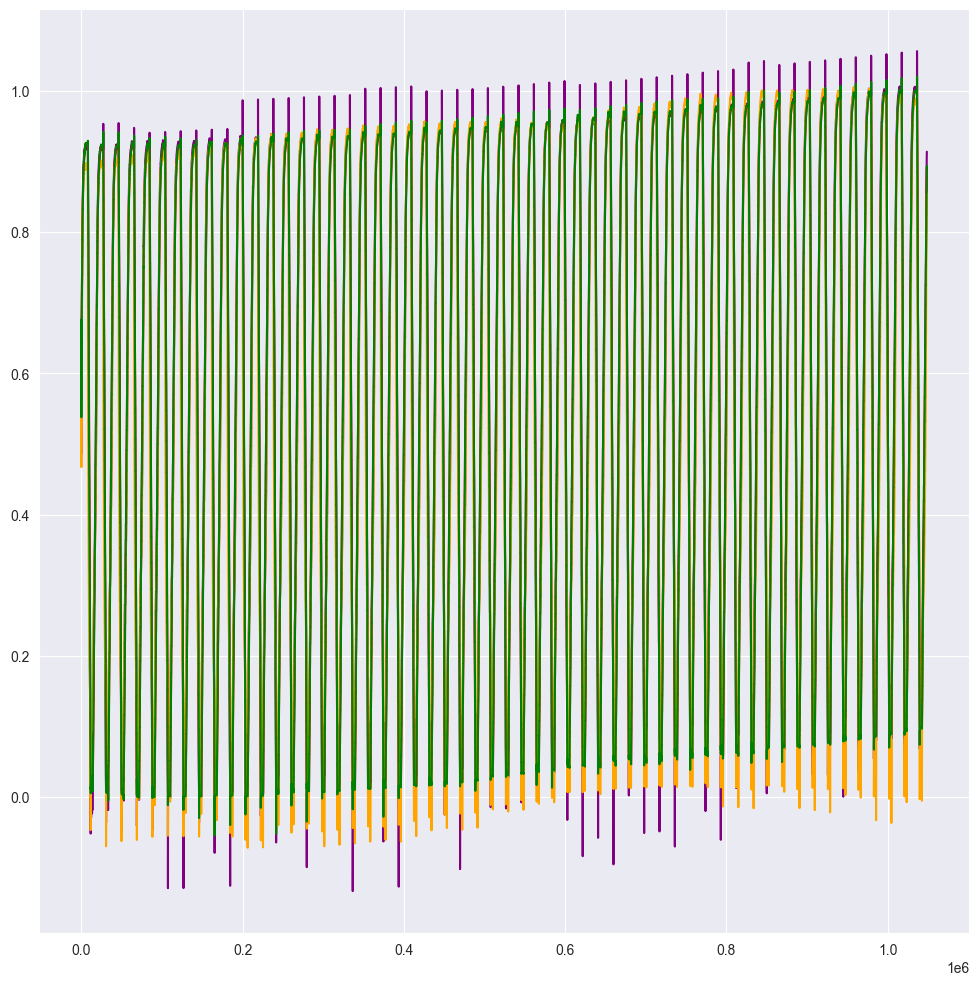

In [38]:
plt.figure(figsize=(12,12))
plt.plot(Y_pred_12,color='purple')
plt.plot(Y,color='red')
plt.plot(Y_pred_7,color='orange')
plt.plot(Y_pred_3,color='green')

# Dataset of pred values

In [39]:
final_results = {'Raw':Y.tolist(), 'NN': example_1.tolist(), 'LSTM': example_2.tolist(),'CNN': example_3.tolist()}
prediction_data_1 = pd.DataFrame(final_results)

In [40]:
prediction_data_1

,Raw,NN,LSTM,CNN
0,0.629932,0.676185,0.563738,0.588701
1,0.629554,0.537873,0.467187,0.485966
2,0.629679,0.551132,0.478960,0.498598
3,0.629821,0.551132,0.478960,0.498598
4,0.629946,0.551132,0.478960,0.498598
...,...,...,...,...
1048567,0.891719,0.893478,0.854321,0.913469
1048568,0.891719,0.893603,0.854496,0.913590
1048569,0.891719,0.893727,0.854672,0.913711
1048570,0.891719,0.893727,0.854672,0.913711


In [41]:
prediction_data_1.to_csv('prediction_data.csv')

# Model 3 Pred values analysis

CPU times: total: 11min 21s
Wall time: 11min 32s


C:\Users\Bhawit Balodi\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:885: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:885: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

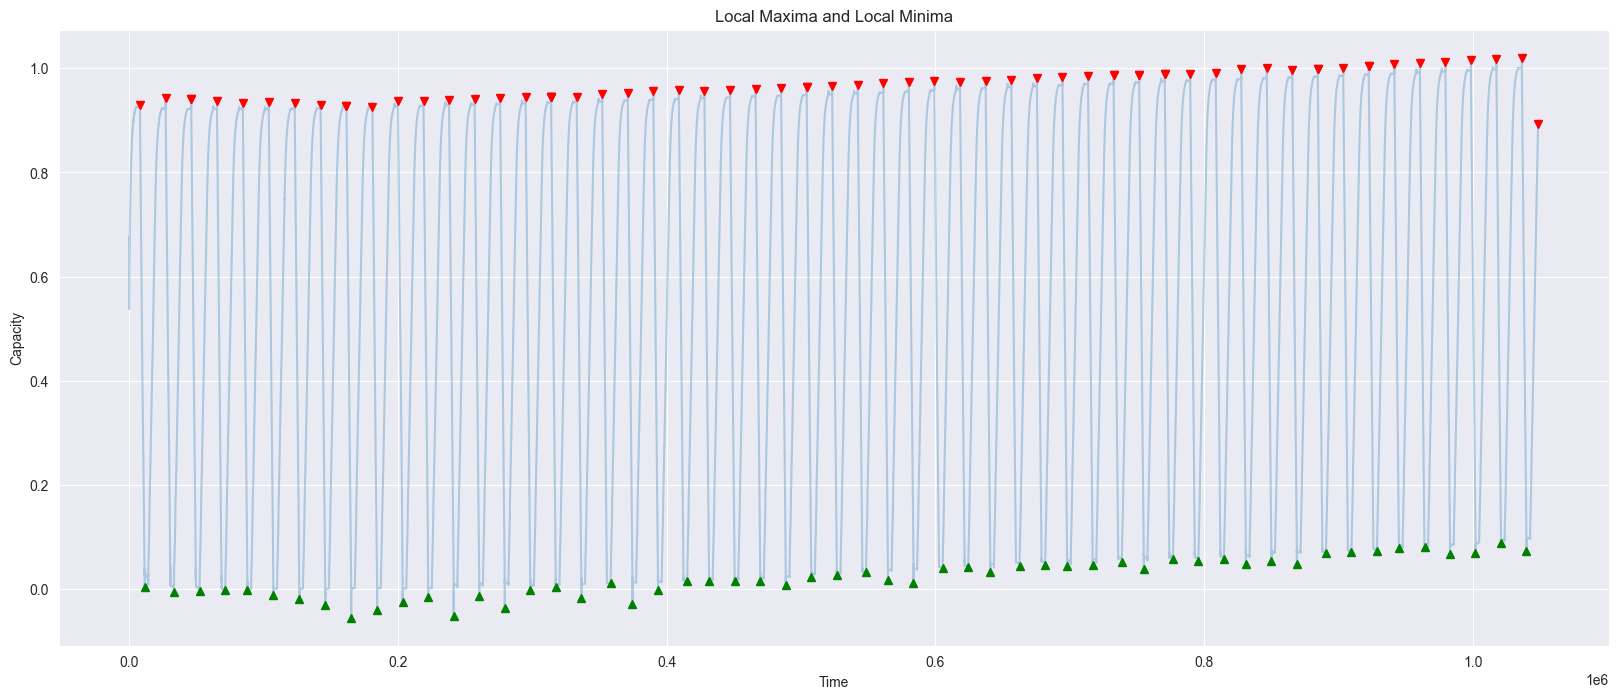

In [42]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(prediction_data_1.NN.values, np.less_equal, order=10000)[0]
ilocs_max = argrelextrema(prediction_data_1.NN.values, np.greater_equal, order=10000)[0]

prediction_data_1.NN.plot(figsize=(20,8), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
prediction_data_1.iloc[ilocs_max].NN.plot(style='.', lw=1, color='red', marker="v");
prediction_data_1.iloc[ilocs_min].NN.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [43]:
maximum_point_NN =  prediction_data_1['NN'][ilocs_max].unique()
minimum_point_NN = prediction_data_1['NN'][ilocs_min].unique()

In [44]:
print(maximum_point_NN)
print('Maximum Point is - ',maximum_point_NN.max())

[0.92925251 0.94203621 0.94149828 0.93665516 0.93321252 0.93541765
 0.93283176 0.93041307 0.92799461 0.92570955 0.93665147 0.9363578
 0.93926013 0.94142157 0.94343734 0.94409204 0.94472516 0.945319
 0.95044714 0.95311391 0.95558918 0.95778394 0.95549178 0.95768964
 0.95988661 0.96208155 0.96427965 0.96647346 0.96866995 0.97086763
 0.97306448 0.97525972 0.97297287 0.97540599 0.97830176 0.98059416
 0.98286301 0.98507655 0.98697734 0.98790634 0.98883611 0.98976153
 0.99171674 0.9985438  1.00053072 0.99738628 0.99893212 1.00127387
 1.00426745 1.00727224 1.01010394 1.01274502 1.0153842  1.01802588
 1.02022934 0.89385152]
Maximum Point is -  1.0202293395996094


Text(0.5, 1.0, 'Dataset')

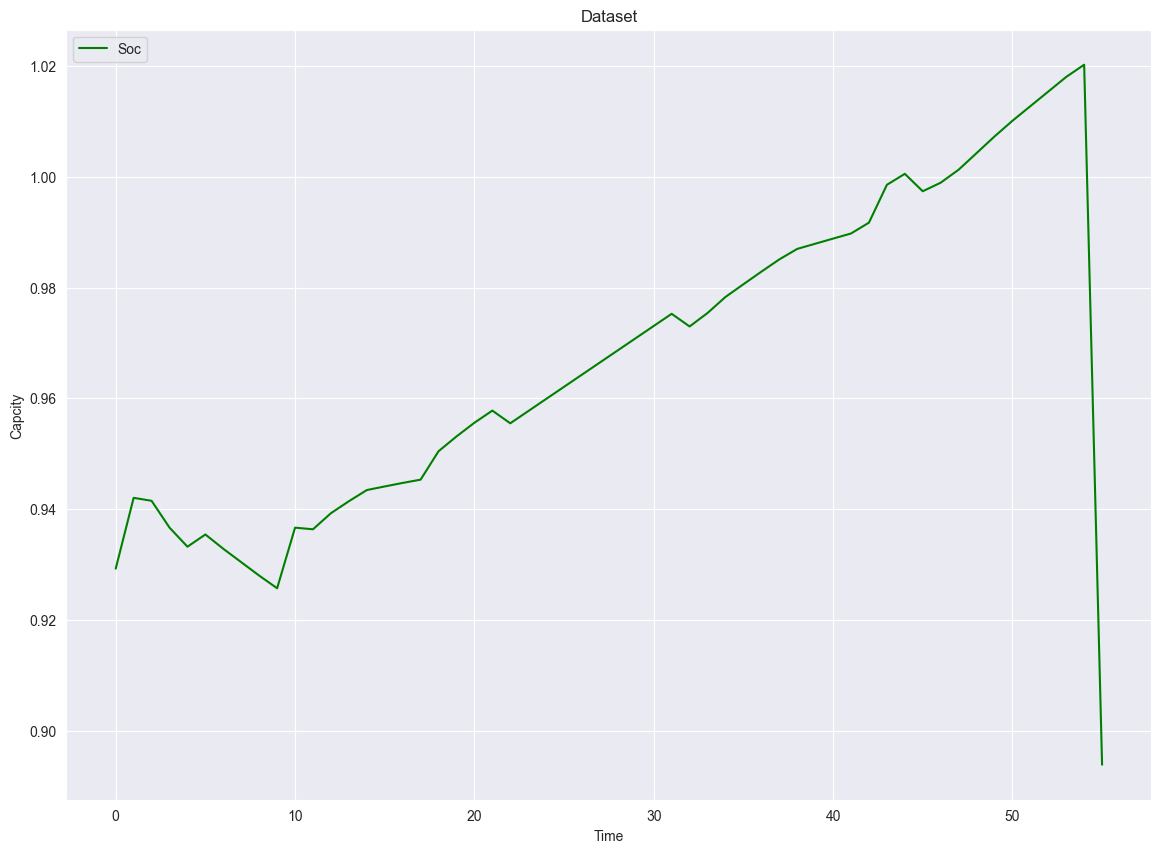

In [45]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
# plt.plot(df['SOC'],color='orange')
plt.plot(maximum_point_NN,color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

# LSTM SOC

CPU times: total: 12min 42s
Wall time: 13min 2s


C:\Users\Bhawit Balodi\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:885: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:885: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

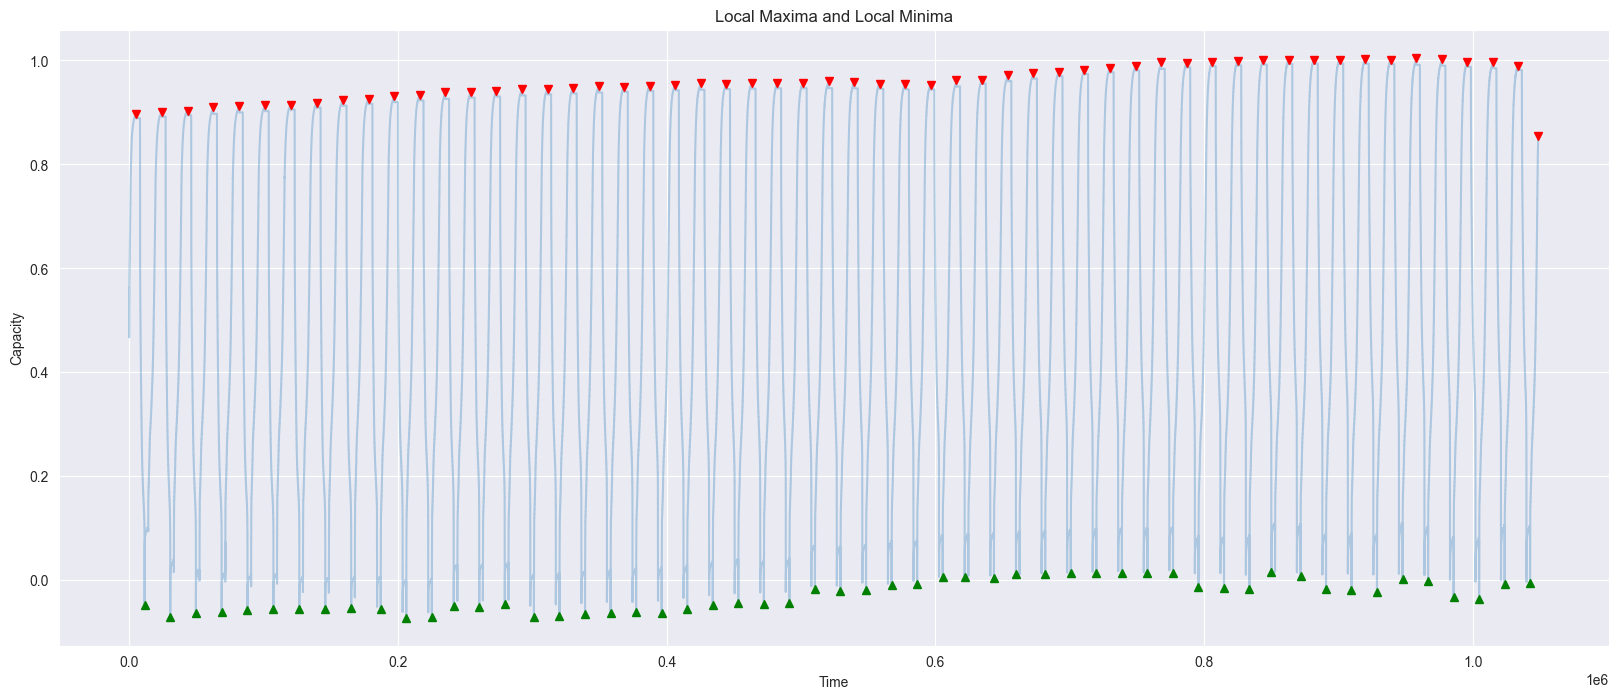

In [46]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(prediction_data_1.LSTM.values, np.less_equal, order=10000)[0]
ilocs_max = argrelextrema(prediction_data_1.LSTM.values, np.greater_equal, order=10000)[0]

prediction_data_1.LSTM.plot(figsize=(20,8), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
prediction_data_1.iloc[ilocs_max].LSTM.plot(style='.', lw=1, color='red', marker="v");
prediction_data_1.iloc[ilocs_min].LSTM.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [47]:
maximum_point_lstm = prediction_data_1['LSTM'][ilocs_max].unique()
minimum_point_lstm = prediction_data_1['LSTM'][ilocs_min].unique()

In [48]:
print(maximum_point_lstm)
print('Maximum Point is - ',maximum_point_lstm.max())

[0.89778173 0.90144002 0.90356237 0.90952873 0.91159308 0.91420913
 0.91454405 0.91837478 0.92434287 0.92562097 0.93235546 0.93287724
 0.93889213 0.93951404 0.94083327 0.94561738 0.94508308 0.9467895
 0.95124066 0.94973093 0.95058846 0.95268029 0.95679063 0.95411456
 0.9561463  0.95576328 0.95609897 0.9610256  0.95936924 0.95493555
 0.95381463 0.95326614 0.96198994 0.962412   0.97265798 0.97666597
 0.9768368  0.98215598 0.98477328 0.98939413 0.99608308 0.99500376
 0.99748665 0.998151   1.00071621 1.00070679 1.00134075 1.00153434
 1.00257659 1.00055015 1.00525618 1.00295925 0.99683756 0.99626607
 0.98960477 0.85484749]
Maximum Point is -  1.005256175994873


Text(0.5, 1.0, 'Dataset')

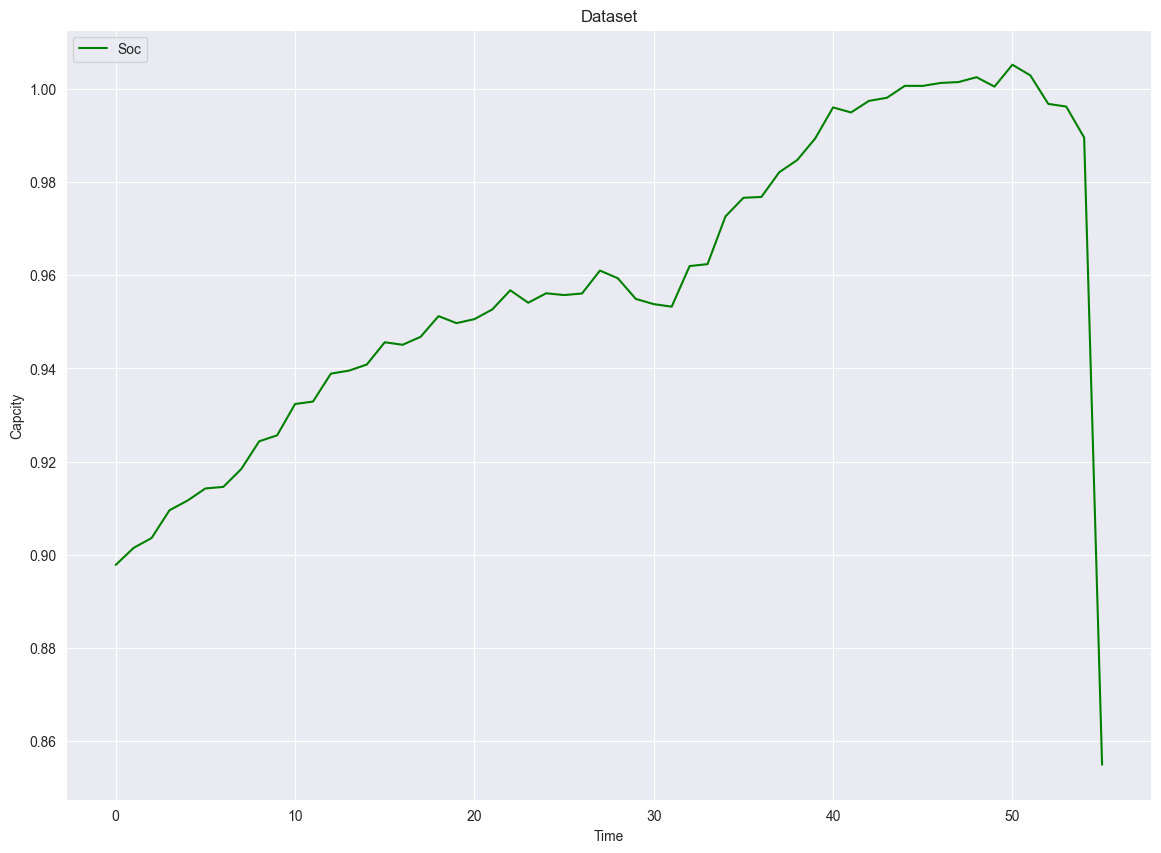

In [49]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(maximum_point_lstm,color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

# CNN SOC

CPU times: total: 10min 3s
Wall time: 10min 23s


C:\Users\Bhawit Balodi\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:885: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:885: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

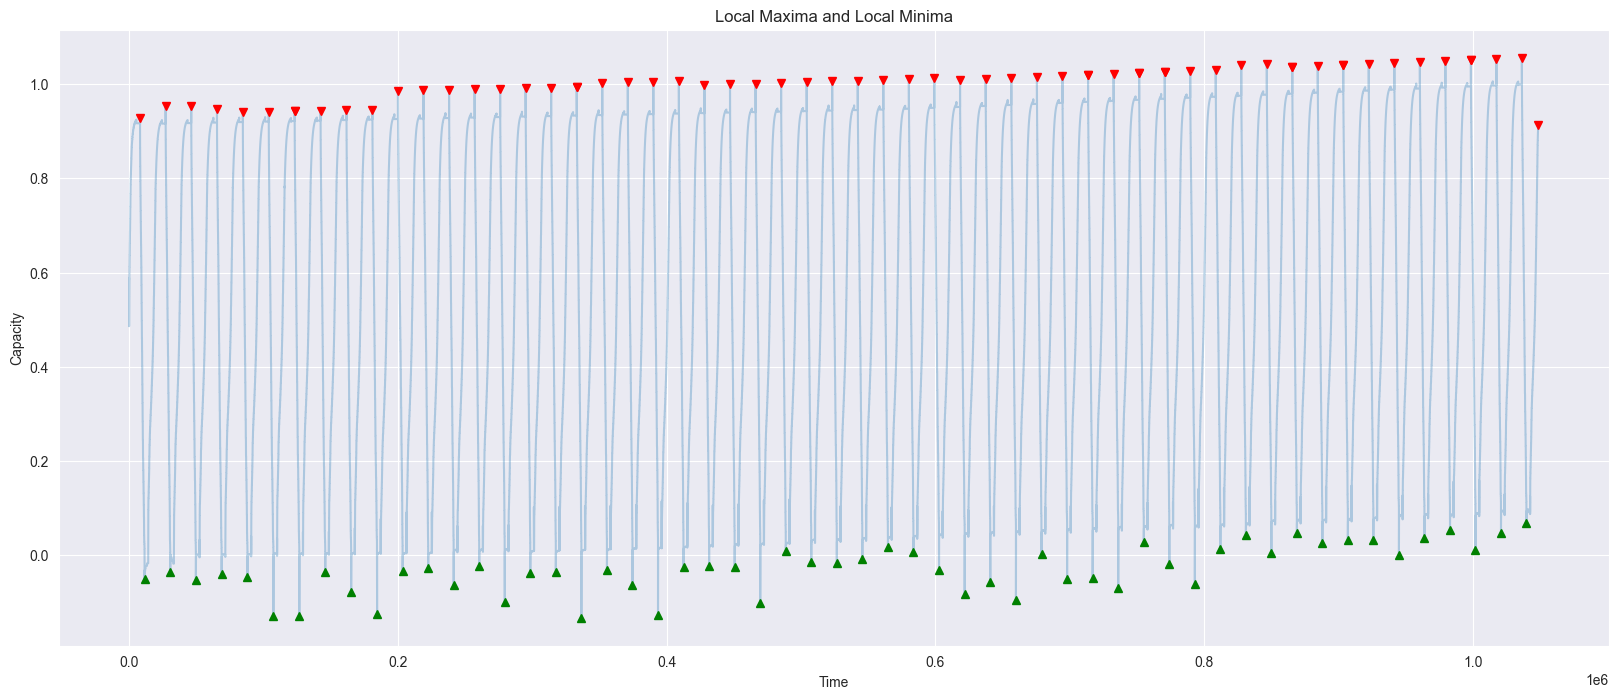

In [50]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(prediction_data_1.CNN.values, np.less_equal, order=10000)[0]
ilocs_max = argrelextrema(prediction_data_1.CNN.values, np.greater_equal, order=10000)[0]

prediction_data_1.CNN.plot(figsize=(20,8), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
prediction_data_1.iloc[ilocs_max].CNN.plot(style='.', lw=1, color='red', marker="v");
prediction_data_1.iloc[ilocs_min].CNN.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [51]:
maximum_point_CNN = prediction_data_1['CNN'][ilocs_max].unique()
minimum_point_CNN = prediction_data_1['CNN'][ilocs_min].unique()

In [52]:
print(maximum_point_CNN)
print('Maximum Point is - ',maximum_point_lstm.max())

[0.92855585 0.95333433 0.95439661 0.9475587  0.94072491 0.94180048
 0.94287509 0.94395036 0.9450255  0.94610023 0.9866876  0.98774791
 0.98880798 0.98986721 0.99092621 0.99198258 0.99304163 0.99410218
 1.00306737 1.00412667 1.00518572 1.00624466 0.99939996 1.00046051
 1.00152051 1.00257957 1.0039854  1.00587726 1.00777125 1.00966632
 1.0117836  1.01396263 1.0083822  1.01056981 1.0127573  1.01494277
 1.01712334 1.01930463 1.02148664 1.02366769 1.02585042 1.028023
 1.0302012  1.04014552 1.0423274  1.03673434 1.03890705 1.04108047
 1.04325747 1.04544258 1.04761899 1.04979682 1.05197299 1.05415154
 1.05632281 0.91383189]
Maximum Point is -  1.005256175994873


Text(0.5, 1.0, 'Dataset')

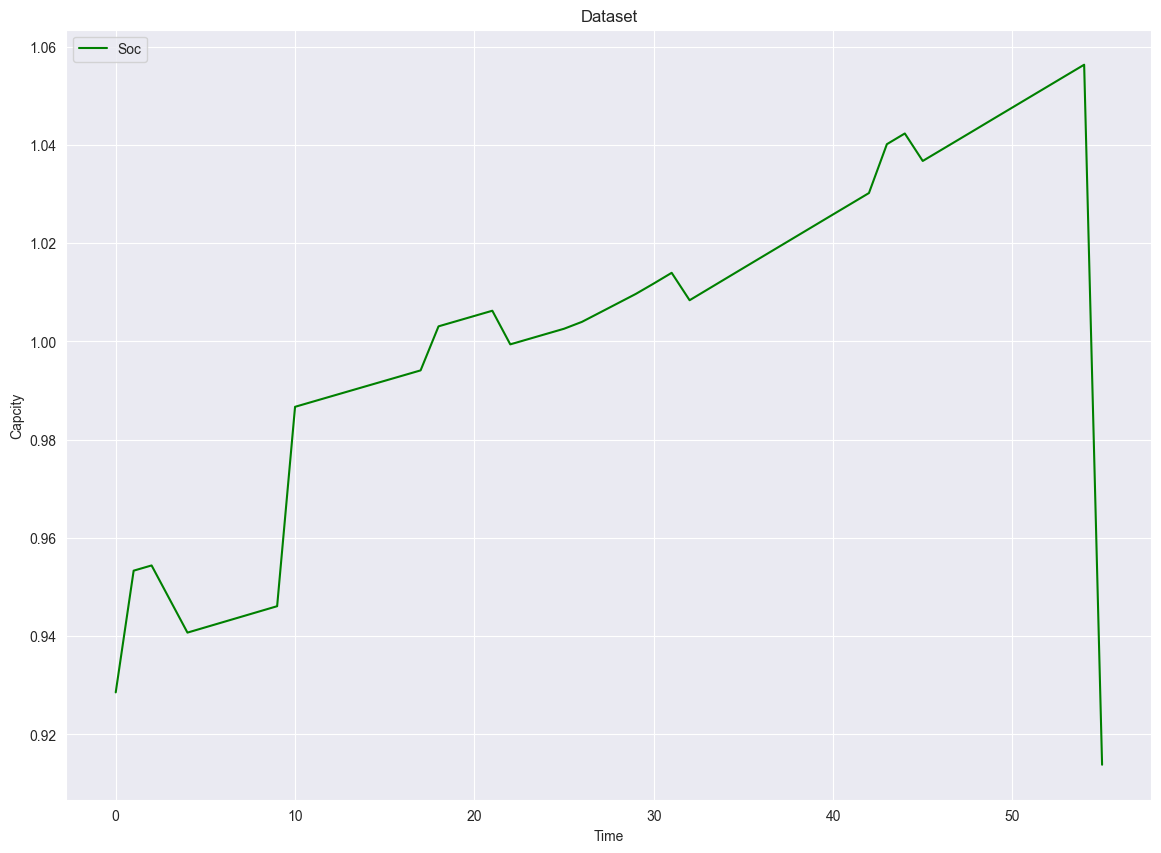

In [53]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(maximum_point_CNN,color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

# Baseline

CPU times: total: 7min 58s
Wall time: 8min 11s


C:\Users\Bhawit Balodi\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:885: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:885: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

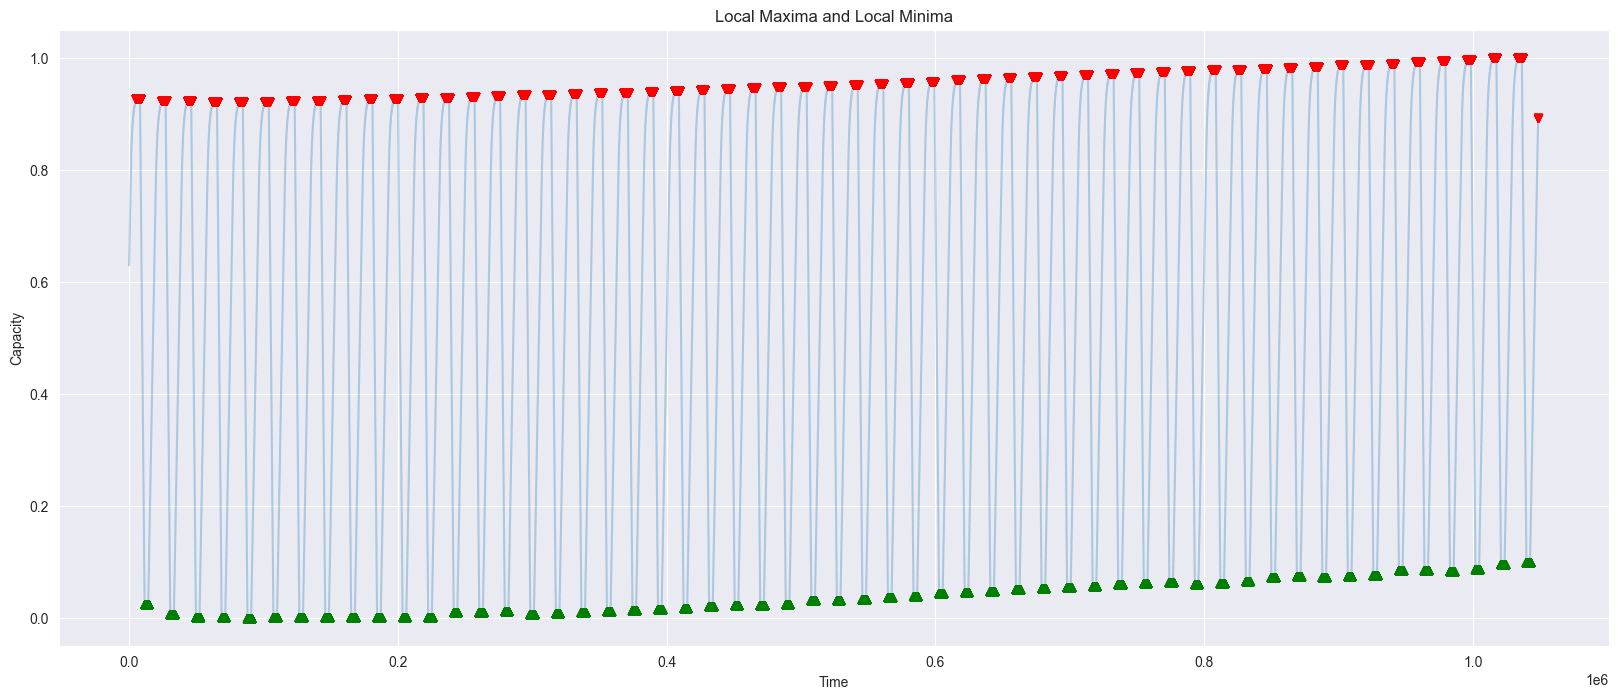

In [54]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(prediction_data_1.Raw.values, np.less_equal, order=10000)[0]
ilocs_max = argrelextrema(prediction_data_1.Raw.values, np.greater_equal, order=10000)[0]

prediction_data_1.Raw.plot(figsize=(20,8), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
prediction_data_1.iloc[ilocs_max].Raw.plot(style='.', lw=1, color='red', marker="v");
prediction_data_1.iloc[ilocs_min].Raw.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [55]:
maximum_point_baseline = prediction_data_1['Raw'][ilocs_max].unique()
minimum_point_baseline = prediction_data_1['Raw'][ilocs_min].unique()

In [56]:
print(maximum_point_baseline)
print('Maximum Point is - ',maximum_point_lstm.max())

[0.92568884 0.92250413 0.92144256 0.9235657  0.92462727 0.92675041
 0.92781198 0.92887355 0.92993512 0.93099669 0.93311983 0.93524297
 0.93630454 0.93736611 0.93948925 0.94055082 0.94267396 0.94373553
 0.94585867 0.94692024 0.94798181 0.95010495 0.95116652 0.95328966
 0.9554128  0.95753594 0.95965908 0.96178221 0.96390535 0.96602849
 0.96709006 0.9692132  0.97027477 0.97239791 0.97452105 0.97558262
 0.97770576 0.97876733 0.9798289  0.98195204 0.98407518 0.98619832
 0.98725989 0.98938303 0.99150617 0.99362931 0.99575245 0.99893716
 0.99999873 0.89171861]
Maximum Point is -  1.005256175994873


Text(0.5, 1.0, 'Dataset')

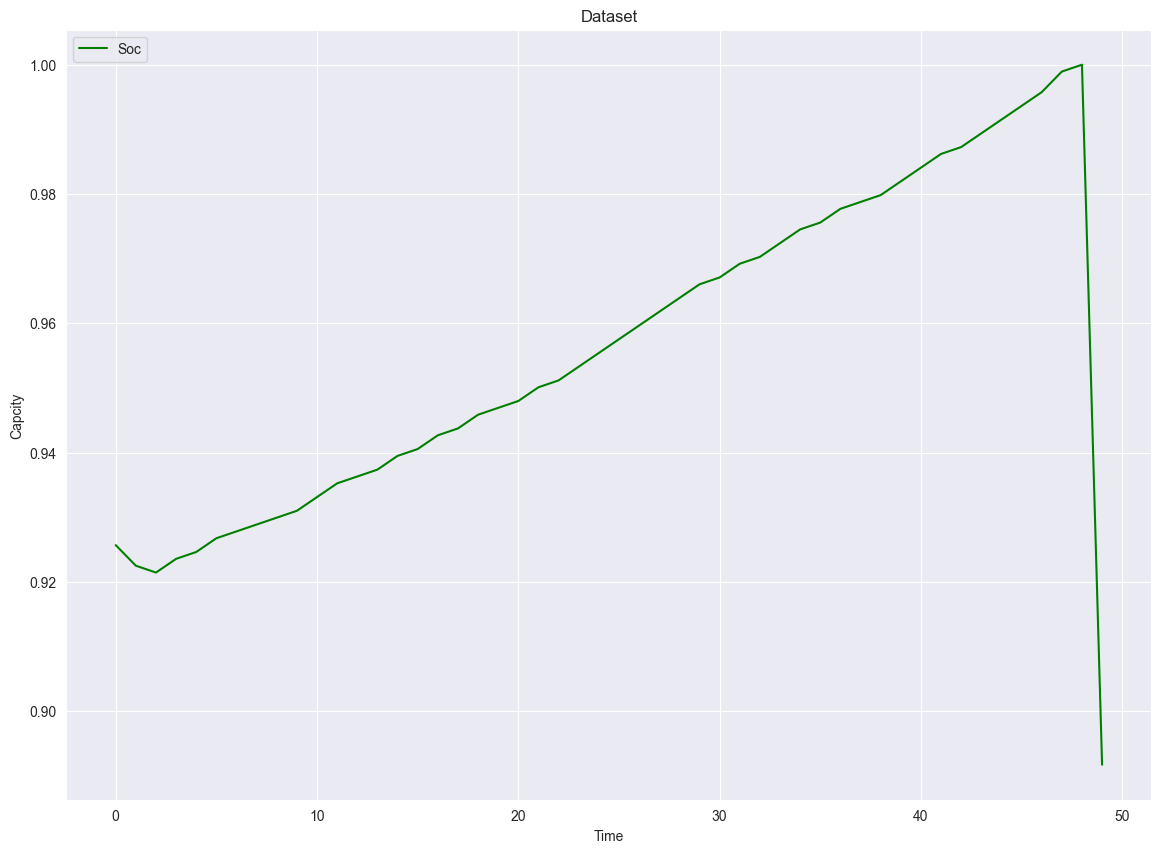

In [57]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(maximum_point_baseline,color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

# Graphs

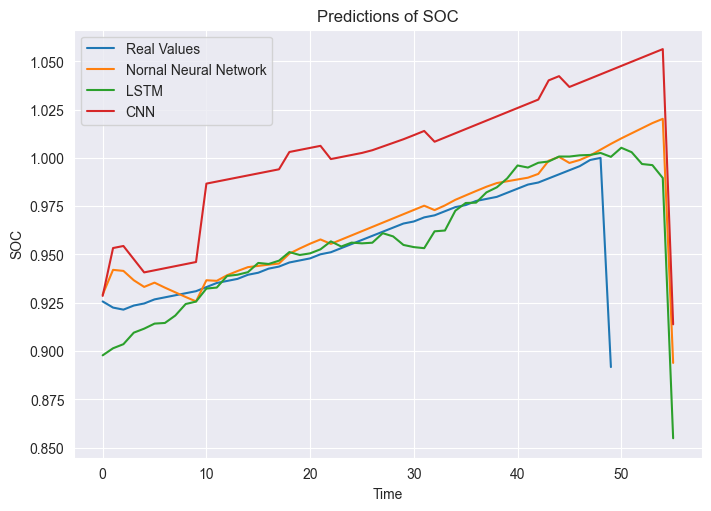

In [58]:
plt.figure(figsize=(7,5), layout='constrained')
plt.plot(raw_maximum_point, label='Real Values')  
plt.plot(maximum_point_NN, label='Nornal Neural Network') 
plt.plot(maximum_point_lstm, label='LSTM')
plt.plot(maximum_point_CNN, label='CNN')
plt.xlabel('Time')
plt.ylabel('SOC')
plt.title("Predictions of SOC")
plt.legend()